# 548 21sp exam1

***Please carefully review and compare this solution with your exam writeup.***
- To request a regrade, send one message to Prof Burden using [Canvas Conversations](https://canvas.uw.edu/conversations) specifying all of the problems you want regraded and your reason for requesting the regrade.
- ***Note that it is possible that a regrade request will result in a decrease in your exam score***, so be sure you understand the solution provided before making a request.
- To help you understand the problems and the solutions provided before you submit your request, Prof Burden is happy to answer questions during class meetings.

15.2 <= scores <= 22.0
median score = 20.2


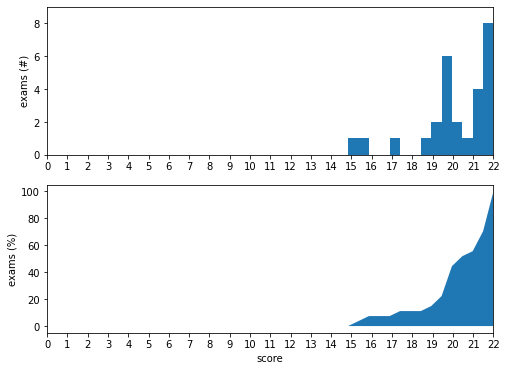

In [40]:
import numpy as np
import pylab as plt

scores = np.array([15.25, 15.5 , 17.  , 18.75, 19.  , 19.  , 19.5 , 19.5 , 19.5 ,
       19.75, 19.75, 19.75, 20.  , 20.25, 20.5 , 21.  , 21.  , 21.25,
       21.25, 21.5 , 21.5 , 21.5 , 21.5 , 21.75, 21.75, 22.  , 22.  ])

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,22)
dxlim = xlim[1] - xlim[0]

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N+1)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# 1. tradeoffs in MIMO systems

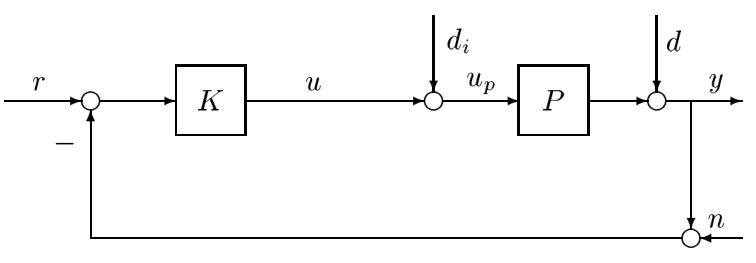

Solve the following problems with reference to the above block diagram -- ***do not*** assume input $u$ has the same dimensions as output $y$.

(a) Determine the transfer matrix $T_{yd}$ from $d$ to $y$.

(b) Determine the transfer matrix $T_{y(r-n)}$ from $r-n$ to $y$.

***Hint:*** you should find that there is a tradeoff between $T_{yd}$ and $T_{y(r-n)}$.

## (a) and (b) solution

Block diagram algebra yields $y = T_o (r - n) + S_o P d_i + S_o d$ where $T_{yd} = S_o = (I + PK)^{-1}$, $T_{y(r-n)} = T_o = I - S_o$.

Observe that 
$$ T_{y(r-n)} = I - (I + PK)^{-1} = (I + PK)(I + PK)^{-1} - (I + PK)^{-1} = PK (I + PK)^{-1} $$
and that
$$ T_{y(r-n)} = I - (I + PK)^{-1} = (I + PK)^{-1}(I + PK) - (I + PK)^{-1} = (I + PK)^{-1} PK. $$

Any of these equivalent ways to write $T_{y(r-n)}$ received full credit.

***Note:*** regardless of how $T_{y(r-n)}$ is written we have $T_{yd} + T_{y(r-n)} = I$, so there is a tradeoff (i.e. a constraint) between the two transfer matrices.

***Note:*** to receive full credit it was necessary to treat transformations as MIMO, which means (i) order of multiplication matters and (ii) a matrix cannot appear in a denominator ($(I + PK)^{-1} \neq 1/(P + PK)$ because the right-hand-side expression is undefined -- cannot divide by a matrix).

# 2. optimization

Consider the quadratic form $J(u) = \frac{1}{2} (u - u_0)^\top M (u - u_0)$.

(a) What condition must $M$ necessarily satisfy to ensure $J$ has a unique stationary point?

(b) What condition must $M$ necessarily satisfy to ensure $J$ has a unique minimum?

## (a) solution

A point $u$ is stationary if $DJ(u) = 0$ -- since $DJ(u) = \frac{1}{2} (u - u_0)^\top (M + M^\top)$, $u = u_0$ is always stationary, and it is unique if $M + M^\top$ is invertible.

Note that it is ***not*** necessary for $M$ have symmetry or definiteness properties for $u_0$ to be the unique stationary point.

## (b) solution

Since $J$ is twice continuously differentiable, it is necessary that $D^2 J = \frac{1}{2}(M + M^\top)$ be symmetric and positive-semi-definite for $u_0$ to be a minimum -- to be a unique minimum, it is necessary that $M + M^\top$ is also invertible, so we conclude $M + M^\top > 0$ is necessary.

Note that $S = \frac{1}{2}(M + M^\top)$ is always symmetric, so we call $S$ the ***symmetric part*** of the matrix; similarly, we define the ***antisymmetric part*** $A = \frac{1}{2}(M - M^\top)$ because $A^\top = - A$.  It can be verified that $x^\top M x = x^\top S x$ for all $x$, so we can restate the necessary condition as follows:  *for $u_0$ to be a unique minimum of $J$, it is necessary that the symmetric part of $M$ is positive-definite*.

# 3. optimal control

Consider the scalar discrete-time linear-quadratic regulator (DT-LQR) problem specified by

$$ x_{s+1} = a\, x_s + b\, u_s,\ J(u) = \sum_{s=0}^t (q\, x_s^2 + r\, u_s^2). $$

Use parameters $a = b = q = r = 1$ and $t = 5$ in what follows.

(a) Use the formula for the DT-LQR solution from lecture to determine the sequence of optimal feedback gains $(k_0,k_1,\dots,k_5)$ such that $u_s^\ast = - k_s x_s$ is the optimal input at time $s$.

(b) Determine the sequence of optimal inputs $u^* = (u_0^\ast,u_1^\ast,\dots,u_5^\ast)$ for initial condition $x_0 = 1$ using gradient descent: starting from $u = 0\in\mathbb{R}^6$ run 1000 iterations of $u^+ = u - \alpha\, DJ(u)^\top$ with $\alpha = 10^{-2}$.

***Hint:*** the result in (b) should agree with the result obtained from the answer in (a).

***Note:*** there is some contingency between these two problems as indicated by the hint -- if the answer in (a) is incorrect, but the code in (b) looks correct and the answer agrees with (a), then full credit is awarded on (b).

## (a) solution

In [ ]:
import numpy as np

a = b = q = r = 1.
t = 5

k = np.zeros(t+1)
p = 0
for s in np.arange(t+1)[::-1]:
  k[s] = (b*p*b + r)**(-1) * b*p*a
  p = (a - b*k[s])*p*(a - b*k[s]) + k[s]*r*k[s] + q

k

array([0.61797753, 0.61764706, 0.61538462, 0.6       , 0.5       ,
       0.        ])

***Note:*** it is possible to perform these calculations directly in the set of rational numbers without making floating-point approximations, yielding

$$ k = (55/89,21/34,8/13,3/5,1/2,0). $$

## (b) solution

In [ ]:
def Jacobian(g,y,d=1e-4):
  e = np.identity(len(y))
  Dyg = []
  for j in range(len(y)):
      Dyg.append((.5/d)*(g(y+d*e[j]) - g(y-d*e[j])))
  return np.array(Dyg).T

In [ ]:
x0 = 1.

# define cost function
def cost(u):
  x = np.zeros(t+1)
  x[0] = x0
  c = 0
  for s in np.arange(t):
    x[s+1] = a*x[s] + b*u[s]
    c += q*x[s]**2 + r*u[s]**2
  c += q*x[t]**2 + r*u[t]**2
  return c

In [ ]:
# sanity check DT-LQR solution and cost function
x_ = np.zeros(t+1)
x_[0] = x0
u_ = np.zeros(t+1)
c_ = 0
for s in np.arange(t):
  u_[s] = -k[s]*x_[s]
  x_[s+1] = a*x_[s] + b*u_[s]
  c_ += q*x_[s+1]**2 + r*u_[s+1]**2

# DT-LQR cost equals x_0^T P_0 x_0
assert np.allclose(cost(u_),p*x0**2)

# DT-LQR input is a stationary point of cost
assert np.allclose(0,Jacobian(cost,u_))

u_

array([-0.61797753, -0.23595506, -0.08988764, -0.03370787, -0.01123596,
        0.        ])

In [ ]:
# gradient descent
u = np.zeros(t+1)
for _ in range(1000):
  u -= .01*Jacobian(cost,u)

# gradient descent input converges to DT-LQR input
np.allclose(u,u_)

# feedback gains agree with DT-LQR
np.allclose(k,-u_/x_)

True

# 4. optimal proportional-derivative control

Consider a second-order system,

$$ \ddot{y} = u, $$

and infinite-horizon quadratic cost,

$$ \frac{1}{2} \int_0^\infty y(t)^2 + u(t)^2 dt. $$

(a) Show how to use the information given above to formulate an equivalent infinite-horizon continuous-time linear-quadratic regulator (CT-LQR) problem (i.e. specify the $A$, $B$, $Q$, and $R$ matrices).

(b) Solve the CT-LQR problem in (a) to determine optimal proportional-derivative controller gains $u = -k_P y - k_D \dot{y}$.

***Note:*** there is some contingency between these two problems -- if the answer in (b) is consistent with the answer in (a), full credit is awarded in (b) regardless of whether the answer in (a) is correct.

## (a) solution

Choosing state $x = (y,\dot{y})\in\mathbb{R}^{2}$ yields $\dot{x} = A x + B u$ where

$$ A = \left[ \begin{array}{cc} 0 & 1 \\ 0 & 0 \end{array} \right],\  B = \left[ \begin{array}{cc} 0 \\ 1 \end{array} \right]. $$

Letting $Q = \left[ \begin{array}{cc} 1 & 0 \\ 0 & 0 \end{array} \right]\in\mathbb{R}^{2\times 2}$, $R = 1\in\mathbb{R}$ yields

$$ \text{cost} = \frac{1}{2} \int_0^\infty x(t)^\top Q x(t) + u(t)^\top R u(t) dt. $$

This is an infinite-horizon continuous-time linear-quadratic regulator (CT-LQR) problem whose solution yields a matrix $K = \left[ \begin{array}{cc} K_1 & K_2 \end{array} \right]\in\mathbb{R}^{1 \times 2}$ such that $u^\ast(t) = - K x(t)$ is the optimal control input at every time $t$.  Thus, $k_P = K_1$ and $k_D = K_2$ are the optimal proportional-derivative controller gains.

## (b) solution

From the homework 3 bonus we know that the optimal gain is $K = R^{-1} B^\top P$ where $P\in\mathbb{R}^{2\times 2}$ solves the Riccati equation

$$ A^\top P + P A - P B R^{-1} B^\top P + Q = 0. $$

In [30]:
import sympy as sym

A = sym.Matrix([[0,1],[0,0]])
B = sym.Matrix([[0],[1]])
Q = sym.Matrix([[1,0],[0,0]])
R = sym.Matrix.eye(1)

P1,P12,P2 = sym.symbols(r'P_1, P_{12}, P_2',real=True,positive=True)

P = sym.Matrix([[P1,P12],[P12,P2]])
P

Matrix([
[   P_1, P_{12}],
[P_{12},    P_2]])

Note that, due to the structure of $B$, we only need to determine two of the entries in $P$ to define $K$, namely, $P_{12}$ and $P_2$:

In [31]:
K = R.inv() @ B.T @ P
K

Matrix([[P_{12}, P_2]])

Inspecting the Riccati equation, we find $P_{12} = 1$ and $P_2 = \sqrt{2}$.

In [32]:
A.T @ P + P @ A - P @ B @ R.inv() @ B.T @ P + Q

Matrix([
[   1 - P_{12}**2,   P_1 - P_2*P_{12}],
[P_1 - P_2*P_{12}, -P_2**2 + 2*P_{12}]])

This solution can also be obtained directly with Sympy:

In [33]:
sol = sym.solve(A.T @ P + P @ A - P @ B @ R.inv() @ B.T @ P + Q,P)[0]

P_ = P.subs({P1:sol[0],P12:sol[1],P2:sol[2]})

K_ = R.inv() @ B.T @ P_
K_

Matrix([[1, sqrt(2)]])

The result can also be obtained using the `solve_continuous_are` ("are" = "algebraic Riccati equation") function provided by SciPy's `linalg` module or the `lqr` function provided by the Python Control library:

In [34]:
import numpy as np
import scipy as sp
from scipy import linalg as la

_A = np.array(A,dtype=np.float)
_B = np.array(B,dtype=np.float)
_Q = np.array(Q,dtype=np.float)
_R = np.array(R,dtype=np.float)

_P = la.solve_continuous_are(_A,_B,_Q,_R)
assert np.allclose(_P,np.array(P_,dtype=np.float))

_K = la.inv(_R) @ _B.T @ _P
assert np.allclose(_K,np.array(K_,dtype=np.float))

***Warning:*** installing `slycot` and `control` will take some time ...

In [25]:
!pip install slycot
!pip install control

     |████████████████████████████████| 1.6MB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417833 sha256=5a0e87efc9811c8949b20cff1d716ddc8577bf01b7bd634c2b1384b8ebc479ae
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot


(array([[1.        , 1.73205081]]), array([[1.73205081, 1.        ],
        [1.        , 1.73205081]]), array([-0.8660254+0.5j, -0.8660254-0.5j], dtype=complex64))

In [35]:
import control as ctrl

__K = ctrl.lqr(_A,_B,_Q,_R)[0]
assert np.allclose(__K,_K)

# 5. state estimation

Consider the DT-LTV system

$$ x(t+1) = \left[ \begin{array}{ccc} t & \sqrt{t} & e^t \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{array} \right] x(t),\ y(t) = \left[ \begin{array}{cc} 0 & 0 & 1 \end{array} \right] x(t). $$

(a) How many measurements are needed to uniquely determine the system state?

(b) Given measurements $y(1) = 1$, $y(2) = 2$, $y(3) = 3$, determine $x(0)$. 

## (a) solution

Given the structure of the state-transition and observation matrices, we observe:
* $y(t)$ tells us $x_3(t) = y(t)$, but gives no information about $x_1(t), x_2(t)$;
* $y(t)$ and $y(t+1)$ tell us $x_3(t) = y(t)$ and $x_2(t) = x_3(t+1) - x_3(t) = y(t+1) - y(t)$, but gives no information about $x_1(t)$;
* $y(t)$, $y(t+1)$, and $y(t+2)$ tell us $x_3(t) = y(t)$, $x_2(t) = x_3(t+1) - x_3(t) = y(t+1) - y(t)$, and $x_1(t) = x_2(t+1) - x_2(t) = (y(t+2) - y(t+1)) - (y(t+1) - y(t))$.

So we conclude that 3 measurements are needed to uniquely determine the system state.

Another way to see this is to construct the observability matrix (*)

$$ \mathcal{O} = \left[ \begin{array}{c} C \\ C A \\ C A^2 \end{array} \right] = \left[ \begin{array}{ccc} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{array} \right]. $$

Since $\mathcal{O}$ is square and invertible, we conclude 3 measurements are needed to uniquely determine the system state.

(* Although $A$ is time-varying, this observability matrix is time-invariant.)

In [ ]:
import sympy as sym

t = sym.symbols(r't')

A = sym.Matrix([[t,sym.sqrt(t),sym.exp(t)],[1,0,0],[0,1,0]])
C = sym.Matrix([[0,0,1]])

O = sym.Matrix.vstack(C,C@A,C@A@A)
O

Matrix([
[0, 0, 1],
[0, 1, 0],
[1, 0, 0]])

## (b) solution

The solution to (a) immediately gives $x(1) = (3,2,1)$.  To determine $x(0)$ we invert the relationship $x(1) = A(0) x(0)$ to find that $x(0) = (2,1,3)$.

In [ ]:
x1 = sym.Matrix([[3],[2],[1]])
x0 = A.subs({t:0}).inv() @ x1
x0

Matrix([
[2],
[1],
[3]])